### Работа с целевой переменной  
#### Цель работы  
Познакомиться с основными приемами обработки данных в отношении к целевой переменной: дискретизация, отбор признаков, устранение дисбаланса классов.  

#### Содержание работы  
Загрузите первый датасет для регрессии и познакомьтесь с его структурой.  
Постройте простую модель регрессии и оцените ее качество.  
Отберите признаки, наиболее сильно влияющие на значение целевой переменной.  
Постройте модель на оставшихся данных и оцените ее качество.  
Загрузите второй датасет для регрессии и постройте распределение целевой переменной.  
Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.  
Загрузите датасет для классификации. Постройте распределение целевой переменной.  
Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.  
Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.  
Выравняйте распределение классов путем оверсемплинга с повторением  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


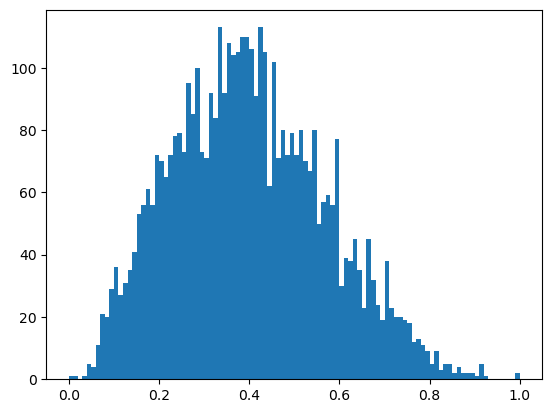

In [4]:
plt.hist(df.target, 100)
_ = plt.plot()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340769823937

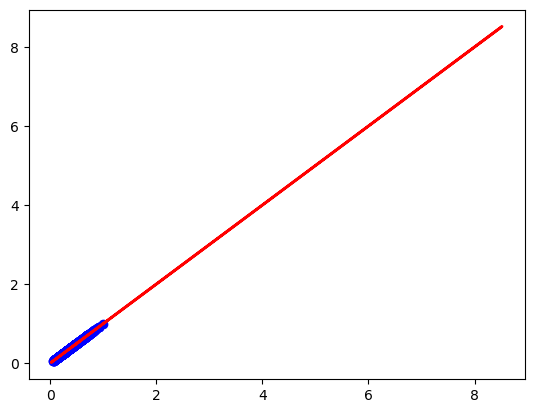

In [12]:
y_pred = baseline.predict(X_test)

plt.scatter(y_test, y_test, color='blue', label='Фактические значения')

plt.plot(y_pred, y_pred, color='red', linewidth=2, label='Линия регрессии')


plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

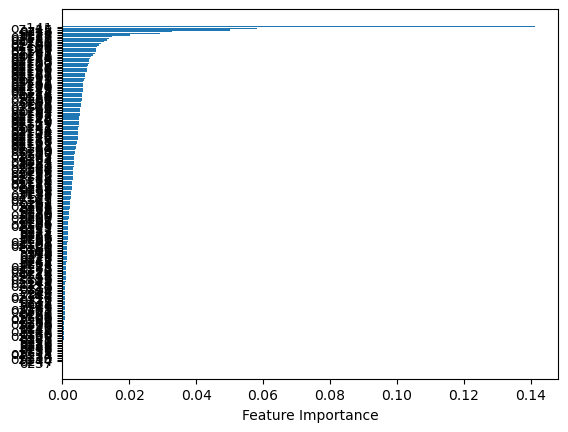

In [14]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [15]:
rf.feature_importances_[sort][-10:]

array([0.01252633, 0.01344159, 0.01395542, 0.01472619, 0.02011126,
       0.02912685, 0.03293003, 0.05017979, 0.05805772, 0.14108686])

In [16]:
df.data.columns[sort][-10:]

Index(['oz201', 'oz20', 'oz155', 'oz112', 'oz137', 'oz18', 'oz35', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

In [17]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz169,oz154,oz123,oz56,oz162,oz157,oz197,oz8,oz198,oz180,oz201,oz20,oz155,oz112,oz137,oz18,oz35,oz48,oz15,oz141
0,0.352613,0.030205,0.035842,0.126277,0.319206,0.000000,0.505899,0.060606,0.039213,0.002655,0.127564,0.000000,0.752291,0.000000,0.000000,0.0625,0.0,0.312855,0.000000,0.041308
1,0.352625,0.016908,0.105006,0.422015,0.306084,0.000281,0.683820,0.373737,0.326584,0.002581,0.475618,0.242424,0.745984,0.222222,0.278945,0.0625,0.4,0.297041,0.282828,0.212274
2,0.352400,0.006922,0.048810,0.000000,0.406309,0.001852,0.499219,0.212121,0.204885,0.002722,0.497968,0.388889,0.753298,0.000000,0.000000,0.1250,0.0,0.288557,0.388889,0.063643
3,0.352497,0.001240,0.105778,0.000000,0.327848,0.000158,0.630533,0.171717,0.023469,0.002473,0.134458,0.095238,0.767469,0.000000,0.039437,0.0000,0.1,0.310692,0.111111,0.031193
4,0.352417,0.011829,0.048810,0.000000,0.329857,0.000037,0.516053,0.101010,0.111398,0.002810,0.295913,0.260870,0.741548,0.000000,0.000000,0.0625,0.0,0.286581,0.304348,0.063643


In [18]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340769823937


0.3874781135354437

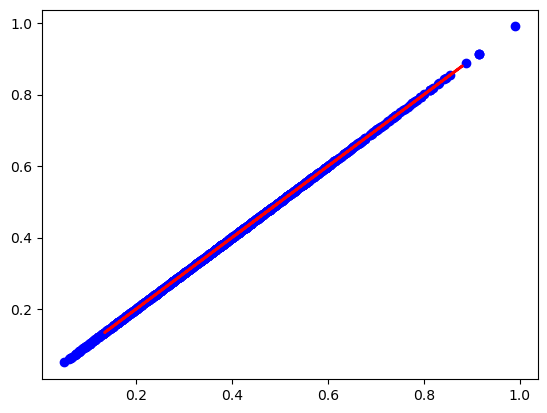

In [23]:
y_pred = better.predict(X_test)

plt.scatter(y_test, y_test, color='blue', label='Фактические значения')

plt.plot(y_pred, y_pred, color='red', linewidth=2, label='Линия регрессии')


plt.show()

In [24]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 61)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340769823937


0.44070427444295546

In [26]:
df = fetch_openml("balance-scale", version=1)

df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


(array([ 49.,   0.,   0.,   0.,   0., 288.,   0.,   0.,   0., 288.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

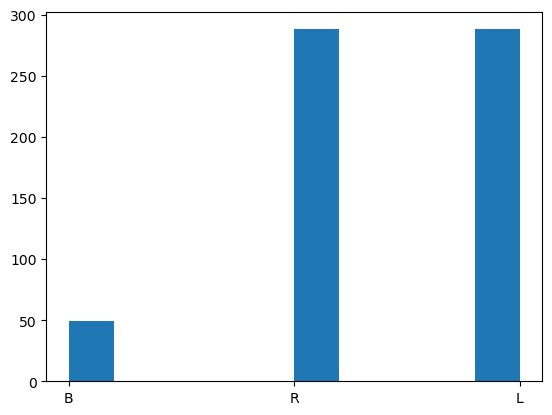

In [27]:
plt.hist(df.target)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

In [29]:
from sklearn.linear_model import LogisticRegression
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [31]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


In [32]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': 4.216216216216216, 'L': 0.7255813953488373, 'R': 0.7222222222222222}

In [33]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [34]:
print(classification_report(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [35]:
y_train.value_counts()

class
R    216
L    215
B     37
Name: count, dtype: int64

In [36]:
X_train["target"] = y_train

In [37]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [38]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


(array([216.,   0.,   0.,   0.,   0., 215.,   0.,   0.,   0., 216.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

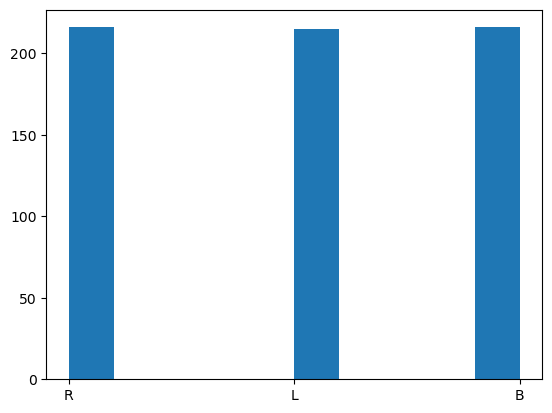

In [39]:
plt.hist(oversampled.target)

In [40]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [41]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [42]:
print(classification_report(y_test, OSmodel.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [43]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

C:\Users\Sofia\AppData\Local\Temp\ipykernel_4884\1011001378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


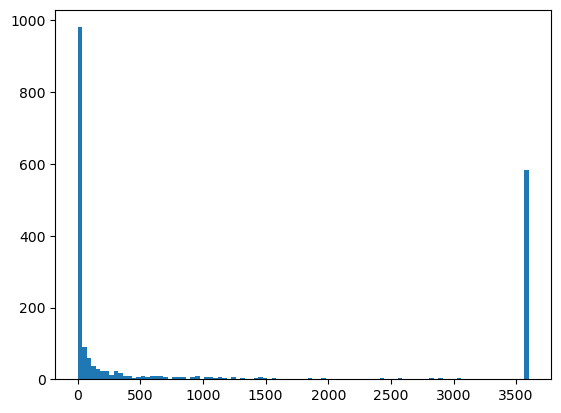

In [44]:
plt.hist(df.target, 100)
_ = plt.plot()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

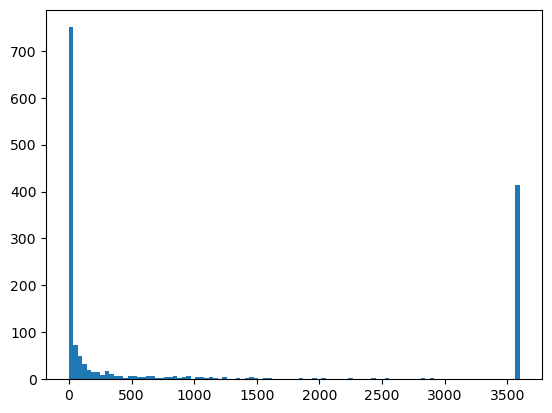

In [46]:
plt.hist(y_train, 100)
_ = plt.plot()

In [47]:
from sklearn.preprocessing import KBinsDiscretizer

y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))

c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


(array([1049.,    0.,   62.,    0.,    0.,   29.,    0.,   17.,    0.,
         424.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

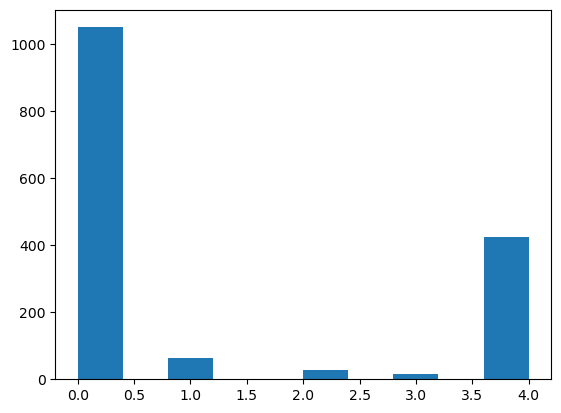

In [48]:
plt.hist(y_binned)

In [49]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))

c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


(array([316.,   0.,   0., 316.,   0.,   0., 316.,   0.,   0., 633.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

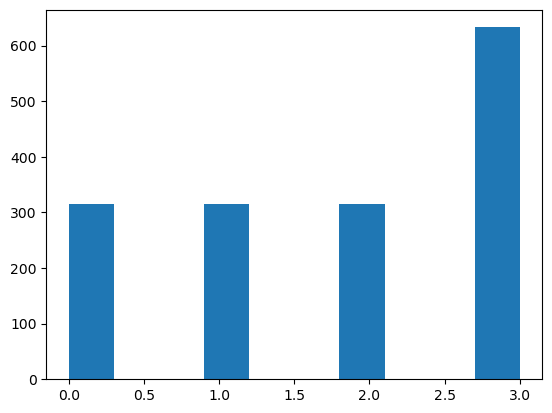

In [50]:
plt.hist(y_binned)